<a href="https://colab.research.google.com/github/JSEFERINO/CURSO5/blob/main/Lab12_Nathaly_Martelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 12: Prueba de la Diferencia entre Dos Medias Poblacionales**

## **Por Nathaly Martelo - T00081461**

### **Ejercicio Ilustrativo: Planteamiento del Problema**
*Se quiere evaluar la efectividad de un nuevo programa de entrenamiento. Se midió el tiempo (en segundos) que tardaron 10 atletas en correr 400 metros antes y después del programa.*

Para evaluar si el **programa de entrenamiento tiene un efecto significativo en el tiempo de carrera**, utilizamos una **prueba t para muestras pareadas**, ya que estamos comparando los tiempos **antes y después del mismo grupo de atletas**.

### 🔢 **Datos resumidos**

| Atleta | Antes | Después | Diferencia (Antes - Después) |
| ------ | ----- | ------- | ---------------------------- |
| 1      | 55.2  | 54.1    | 1.1                          |
| 2      | 56.8  | 55.5    | 1.3                          |
| 3      | 57.1  | 56.9    | 0.2                          |
| 4      | 58.0  | 57.2    | 0.8                          |
| 5      | 54.9  | 54.9    | 0.0                          |
| 6      | 56.3  | 55.8    | 0.5                          |
| 7      | 55.5  | 55.0    | 0.5                          |
| 8      | 57.5  | 56.6    | 0.9                          |
| 9      | 56.0  | 55.9    | 0.1                          |
| 10     | 57.8  | 57.0    | 0.8                          |

---

### ✅ **Paso 1: Hipótesis**

* **H₀ (nula)**: El programa **no tiene efecto**, es decir, la **media de las diferencias es cero**:

  $$
  H_0: \mu_d = 0
  $$
* **H₁ (alternativa)**: El programa **tiene efecto**, es decir, la **media de las diferencias es distinta de cero** (prueba bilateral):

  $$
  H_1: \mu_d \ne 0
  $$

---

### 🧮 **Paso 2: Cálculo de estadísticos**

* $d_i$: diferencia para cada atleta = Antes - Después
* $\bar{d}$: media de las diferencias
* $s_d$: desviación estándar de las diferencias
* $n = 10$: número de diferencias

#### Cálculos:

$$
\bar{d} = \frac{1.1 + 1.3 + 0.2 + 0.8 + 0.0 + 0.5 + 0.5 + 0.9 + 0.1 + 0.8}{10} = \frac{6.2}{10} = 0.62
$$

$$
s_d = \sqrt{\frac{\sum (d_i - \bar{d})^2}{n - 1}} \approx 0.405
$$

$$
t = \frac{\bar{d}}{s_d / \sqrt{n}} = \frac{0.62}{0.405 / \sqrt{10}} \approx \frac{0.62}{0.128} \approx 4.84
$$

---

### 📏 **Paso 3: Comparación con el valor crítico**

* Grados de libertad: $df = n - 1 = 9$
* Nivel de significancia: $\alpha = 0.05$
* Prueba bilateral ⇒ valor crítico $t_{0.025, 9} \approx 2.262$

---

### ✅ **Paso 4: Conclusión**

Como el valor calculado $t = 4.84$ es **mayor que el valor crítico $t_{crítico} = 2.262$**, **rechazamos la hipótesis nula**.

## **Usando R en Colab**

In [ ]:
# Instalar R y rpy2
!apt-get install -y r-base
!pip install rpy2
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython
#%%R

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Estadístico t: 4.516479 
Valor p: 0.001454121 
Rechazamos la hipótesis nula.


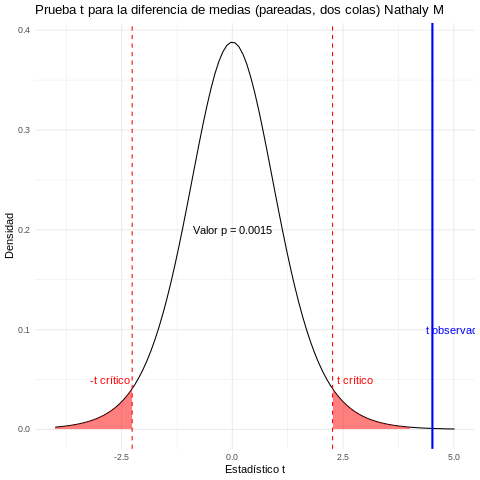

In [ ]:
%%R
# Datos
antes <- c(55.2, 56.8, 57.1, 58.0, 54.9, 56.3, 55.5, 57.5, 56.0, 57.8)
despues <- c(54.1, 55.5, 56.9, 57.2, 54.9, 55.8, 55.0, 56.6, 55.9, 57.0)
diferencias <- antes - despues
n <- length(diferencias)
media_d <- mean(diferencias)
sd_d <- sd(diferencias)
alfa <- 0.05
gl <- n - 1

# Calcular el estadístico de prueba t
t_estadistico <- (media_d - 0) / (sd_d / sqrt(n))
cat("Estadístico t:", t_estadistico, "\n")
# Calcular el valor p (prueba de dos colas)
p_valor <- 2 * pt(abs(t_estadistico), df = gl, lower.tail = FALSE)
cat("Valor p:", p_valor, "\n")
# Decisión
if (p_valor <= alfa) {
  cat("Rechazamos la hipótesis nula.\n")
} else {
  cat("No rechazamos la hipótesis nula.\n")
}
# Visualización de la región crítica y el valor p
library(ggplot2)
library(dplyr)

# Crear el gráfico
df <- data.frame(x = seq(-4, 4, 0.01))
t_critico <- qt(1 - alfa/2, df = gl)

ggplot(df, aes(x = x)) +
  stat_function(fun = dt, args = list(df = gl)) +
  # Región crítica (roja)
  geom_area(data = subset(df, x < -t_critico),
            aes(y = dt(x, df = gl)), fill = "red", alpha = 0.5) +
  geom_area(data = subset(df, x > t_critico),
            aes(y = dt(x, df = gl)), fill = "red", alpha = 0.5) +
  # Valor p (amarillo)
  geom_area(data = subset(df, x > abs(t_estadistico)),
            aes(y = dt(x, df = gl)), fill = "yellow", alpha = 0.5) +
  geom_area(data = subset(df, x < -abs(t_estadistico)),
            aes(y = dt(x, df = gl)), fill = "yellow", alpha = 0.5) +
  # Líneas críticas
  geom_vline(xintercept = c(-t_critico, t_critico), linetype = "dashed", color = "red") +
  # Línea del estadístico observado
  geom_vline(xintercept = t_estadistico, color = "blue", linewidth = 1) +
  # Anotaciones
  annotate("text", x = -t_critico - 0.5, y = 0.05, label = "-t crítico", color = "red") +
  annotate("text", x = t_critico + 0.5, y = 0.05, label = "t crítico", color = "red") +
  annotate("text", x = t_estadistico + 0.5, y = 0.1, label = "t observado", color = "blue") +
  annotate("text", x = 0, y = 0.2, label = paste("Valor p =", round(p_valor, 4)), color = "black") +
  labs(title = "Prueba t para la diferencia de medias (pareadas, dos colas) Nathaly M",
       x = "Estadístico t",
       y = "Densidad") +
  theme_minimal()

## **Usando Python en Colab**

Estadístico t: 4.5164792599612875
Valor p: 0.0014541212479250085
Rechazamos la hipótesis nula.


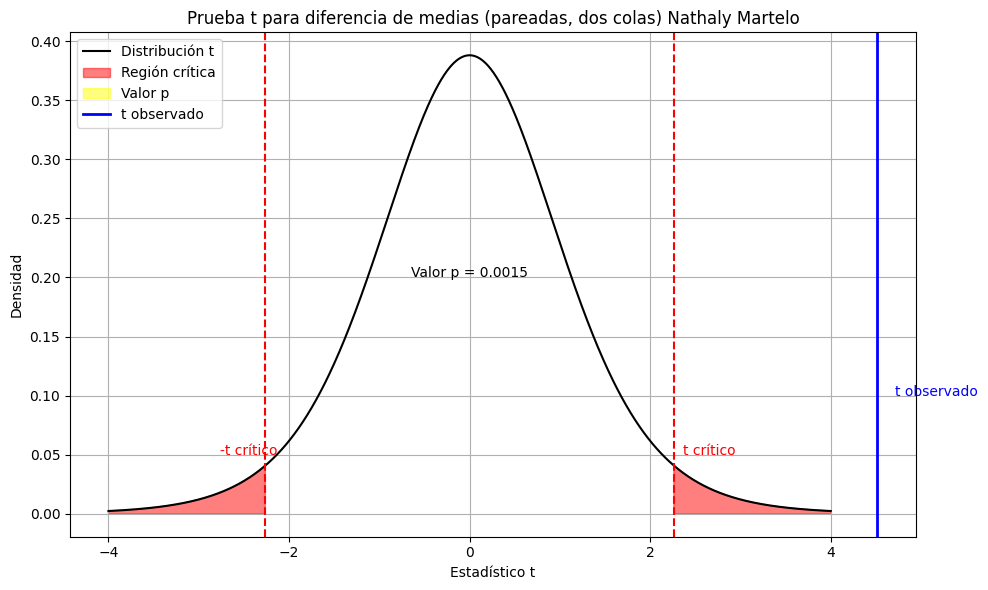

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
antes = np.array([55.2, 56.8, 57.1, 58.0, 54.9, 56.3, 55.5, 57.5, 56.0, 57.8])
despues = np.array([54.1, 55.5, 56.9, 57.2, 54.9, 55.8, 55.0, 56.6, 55.9, 57.0])
diferencias = antes - despues

n = len(diferencias)
media_d = np.mean(diferencias)
sd_d = np.std(diferencias, ddof=1)
alfa = 0.05
gl = n - 1

# Estadístico t
t_estadistico = media_d / (sd_d / np.sqrt(n))
print("Estadístico t:", t_estadistico)

# Valor p (prueba de dos colas)
p_valor = 2 * stats.t.sf(np.abs(t_estadistico), df=gl)
print("Valor p:", p_valor)

# Decisión
if p_valor <= alfa:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

# Visualización
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=gl)
t_critico = stats.t.ppf(1 - alfa / 2, df=gl)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, color='black', label='Distribución t')

# Región crítica (rojo)
plt.fill_between(x, y, where=(x < -t_critico) | (x > t_critico), color='red', alpha=0.5, label='Región crítica')

# Valor p (amarillo)
plt.fill_between(x, y, where=(x < -abs(t_estadistico)) | (x > abs(t_estadistico)), color='yellow', alpha=0.5, label='Valor p')

# Líneas críticas
plt.axvline(x=-t_critico, linestyle='--', color='red')
plt.axvline(x=t_critico, linestyle='--', color='red')

# Línea del estadístico observado
plt.axvline(x=t_estadistico, color='blue', linewidth=2, label='t observado')

# Anotaciones
plt.text(-t_critico - 0.5, 0.05, '-t crítico', color='red')
plt.text(t_critico + 0.1, 0.05, 't crítico', color='red')
plt.text(t_estadistico + 0.2, 0.1, 't observado', color='blue')
plt.text(0, 0.2, f'Valor p = {p_valor:.4f}', color='black', ha='center')

plt.title('Prueba t para diferencia de medias (pareadas, dos colas) Nathaly Martelo')
plt.xlabel('Estadístico t')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Ejercicio 38.5**

## **Ejercicio Ilustrativo 2: Planteamiento de Problema**

Se mide la presión arterial sistólica de 8 pacientes antes y después de tomar un nuevo medicamento. Se calcula la diferencia (Después - Antes). La media de las diferencias es \$\bar{d} = -2.5\$ mmHg y la desviación estándar de las diferencias es \$s\_d = 1.5\$ mmHg.

¿Hay evidencia suficiente para decir que el medicamento **reduce** la presión arterial a un nivel de significancia de \$\alpha = 0.05\$?

---

### 📊 Hipótesis

Queremos comprobar si **el medicamento reduce la presión arterial**, por lo tanto planteamos una prueba de una cola (cola izquierda):

* Hipótesis nula (\$H\_0\$): \$\mu\_d = 0\$ (el medicamento no tiene efecto)
* Hipótesis alternativa (\$H\_1\$): \$\mu\_d < 0\$ (el medicamento reduce la presión arterial)

---

### 📐 Estadístico de prueba

Usamos la **prueba t para muestras pareadas**:

$$
t = \frac{\bar{d} - 0}{s_d / \sqrt{n}} = \frac{-2.5}{1.5 / \sqrt{8}} = \frac{-2.5}{0.5303} \approx -4.714
$$

---

### 🔢 Grados de libertad

$$
gl = n - 1 = 8 - 1 = 7
$$

---

### 📉 Valor crítico y decisión

Con \$\alpha = 0.05\$ y \$gl = 7\$, el valor crítico para una cola es:

$$
t_{\text{crítico}} = -t_{0.05, 7} \approx -1.895
$$

Comparación:

* \$t\_{\text{observado}} = -4.714\$
* \$t\_{\text{crítico}} = -1.895\$

Dado que:

$$
t_{\text{observado}} < t_{\text{crítico}}
$$

---

### ✅ Conclusión

**Rechazamos la hipótesis nula.**

Hay **evidencia suficiente** para afirmar, con un nivel de significancia de \$\alpha = 0.05\$, que **el medicamento reduce significativamente la presión arterial sistólica** en los pacientes.

## **Usando R**

Estadístico t: -4.714 
Valor p: 0.001086294 
Rechazamos la hipótesis nula.


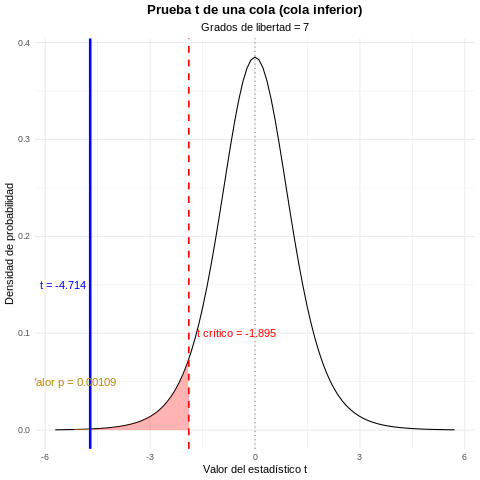

In [ ]:
%%R
# Datos resumidos
media_d <- -2.5
sd_d <- 1.5
n <- 8
alfa <- 0.05
gl <- n - 1

# Calcular el estadístico de prueba t
t_estadistico <- (media_d - 0) / (sd_d / sqrt(n))
cat("Estadístico t:", round(t_estadistico, 4), "\n")

# Calcular el valor p (prueba de cola inferior)
p_valor <- pt(t_estadistico, df = gl, lower.tail = TRUE)
cat("Valor p:", p_valor, "\n")

# Decisión
if (p_valor <= alfa) {
  cat("Rechazamos la hipótesis nula.\n")
} else {
  cat("No rechazamos la hipótesis nula.\n")
}

# Visualización mejorada
library(ggplot2)

# Crear base de datos para graficar
x_vals <- seq(min(-4, t_estadistico - 1), max(4, abs(t_estadistico) + 1), 0.01)
df <- data.frame(x = x_vals)
df$y <- dt(df$x, df = gl)

# Subconjuntos
t_critico <- qt(alfa, df = gl)
df_critico <- subset(df, x < t_critico)
df_pvalor <- subset(df, x < t_estadistico)

# Gráfico
ggplot(df, aes(x = x, y = y)) +
  stat_function(fun = dt, args = list(df = gl)) +
  geom_area(data = df_critico, aes(x = x, y = y), fill = "red", alpha = 0.3) +
  geom_area(data = df_pvalor, aes(x = x, y = y), fill = "yellow", alpha = 0.3) +
  geom_vline(xintercept = t_critico, linetype = "dashed", color = "red", linewidth = 0.8) +
  geom_vline(xintercept = t_estadistico, color = "blue", linewidth = 1.2) +
  geom_vline(xintercept = 0, color = "gray50", linetype = "dotted") +
  annotate("text", x = t_critico, y = 0.1,
           label = paste("t crítico =", round(t_critico, 3)),
           color = "red", hjust = -0.1) +
  annotate("text", x = t_estadistico, y = 0.15,
           label = paste("t =", round(t_estadistico, 3)),
           color = "blue", hjust = 1.1) +
  annotate("text", x = mean(c(min(x_vals), t_estadistico)), y = 0.05,
           label = paste("Valor p =", format.pval(p_valor, digits = 3)),
           color = "darkgoldenrod", size = 4) +
  labs(title = "Prueba t de una cola (cola inferior)",
       subtitle = paste("Grados de libertad =", gl),
       x = "Valor del estadístico t",
       y = "Densidad de probabilidad") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))

## **Usando Python**

Estadístico t: -4.7140
Valor p: 0.0011
Rechazamos la hipótesis nula.


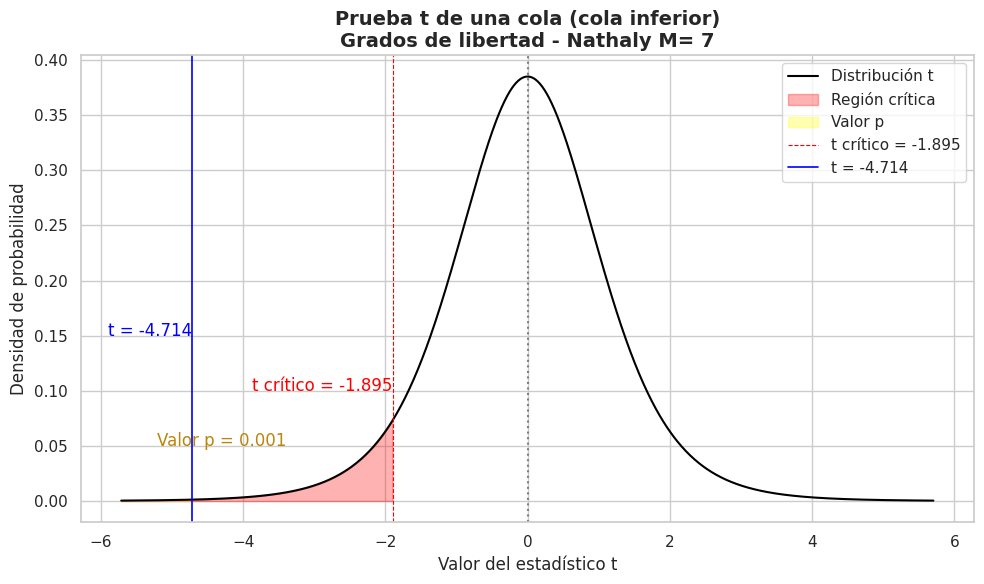

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Datos resumidos
media_d = -2.5
sd_d = 1.5
n = 8
alfa = 0.05
gl = n - 1

# Calcular el estadístico de prueba t
t_estadistico = (media_d - 0) / (sd_d / np.sqrt(n))
print(f"Estadístico t: {t_estadistico:.4f}")

# Calcular el valor p (prueba de cola inferior)
p_valor = stats.t.cdf(t_estadistico, df=gl)
print(f"Valor p: {p_valor:.4f}")

# Decisión
if p_valor <= alfa:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

# Visualización
x_vals = np.arange(min(-4, t_estadistico - 1), max(4, abs(t_estadistico) + 1), 0.01)
y_vals = stats.t.pdf(x_vals, df=gl)

t_critico = stats.t.ppf(alfa, df=gl)

# Crear la figura
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="Distribución t", color="black")

# Área de la región crítica (roja)
x_critico = x_vals[x_vals < t_critico]
y_critico = stats.t.pdf(x_critico, df=gl)
plt.fill_between(x_critico, y_critico, color='red', alpha=0.3, label='Región crítica')

# Área del valor p (amarilla)
x_pvalor = x_vals[x_vals < t_estadistico]
y_pvalor = stats.t.pdf(x_pvalor, df=gl)
plt.fill_between(x_pvalor, y_pvalor, color='yellow', alpha=0.3, label='Valor p')

# Líneas verticales
plt.axvline(t_critico, linestyle='--', color='red', linewidth=0.8, label=f"t crítico = {t_critico:.3f}")
plt.axvline(t_estadistico, color='blue', linewidth=1.2, label=f"t = {t_estadistico:.3f}")
plt.axvline(0, linestyle=':', color='gray')

# Anotaciones
plt.text(t_critico, 0.1, f"t crítico = {t_critico:.3f}", color='red', ha='right')
plt.text(t_estadistico, 0.15, f"t = {t_estadistico:.3f}", color='blue', ha='right')
plt.text((min(x_vals) + t_estadistico)/2, 0.05, f"Valor p = {p_valor:.3f}", color='darkgoldenrod', fontsize=12)

# Configuración del gráfico
plt.title("Prueba t de una cola (cola inferior)\nGrados de libertad - Nathaly M= {}".format(gl), fontsize=14, fontweight='bold')
plt.xlabel("Valor del estadístico t")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.tight_layout()
plt.show()
